# Sheet 2

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnigns
import warnings
warnings.filterwarnings('ignore')
#Preprocessing features
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler,StandardScaler #for standardization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn import model_selection

In [3]:
!pip install openpyxl
df = pd.read_excel("/data/notebook_files/Red_wine(1).xlsx")
df.head()

     |████████████████████████████████| 249 kB 31.2 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity 0
volatile acidity 0
citric acid 0
residual sugar 0
chlorides 0
free sulfur dioxide 0
total sulfur dioxide 1
density 0
pH 1
sulphates 0
alcohol 0
quality 1
dtype: int64

In [6]:
## ano of nan value are very low we can drop them
df.dropna(inplace=True)
df.isna().sum()

fixed acidity 0
volatile acidity 0
citric acid 0
residual sugar 0
chlorides 0
free sulfur dioxide 0
total sulfur dioxide 0
density 0
pH 0
sulphates 0
alcohol 0
quality 0
dtype: int64

In [7]:
df['quality'].value_counts()

5.0 679
6.0 637
7.0 199
4.0 53
8.0 18
3.0 10
Name: quality, dtype: int64

# Univariate

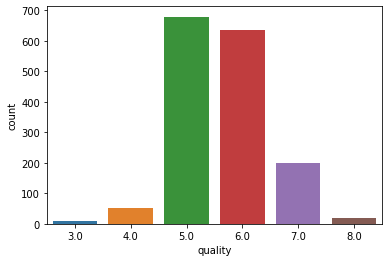

In [8]:
# df.quality.value_counts().plot(kind="bar")
sns.countplot(df.quality)
plt.show()

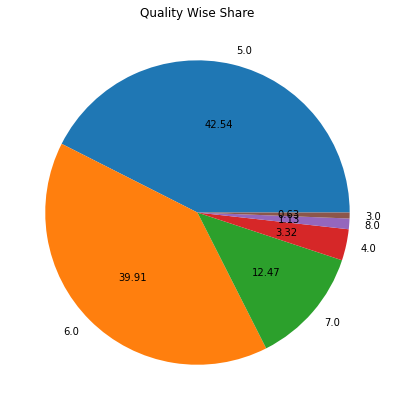

In [9]:
plt.figure(figsize=(7,7))
df.quality.value_counts().plot(kind="pie",autopct="%.2f")
plt.axis('off') 
plt.title("Quality Wise Share")
plt.show()

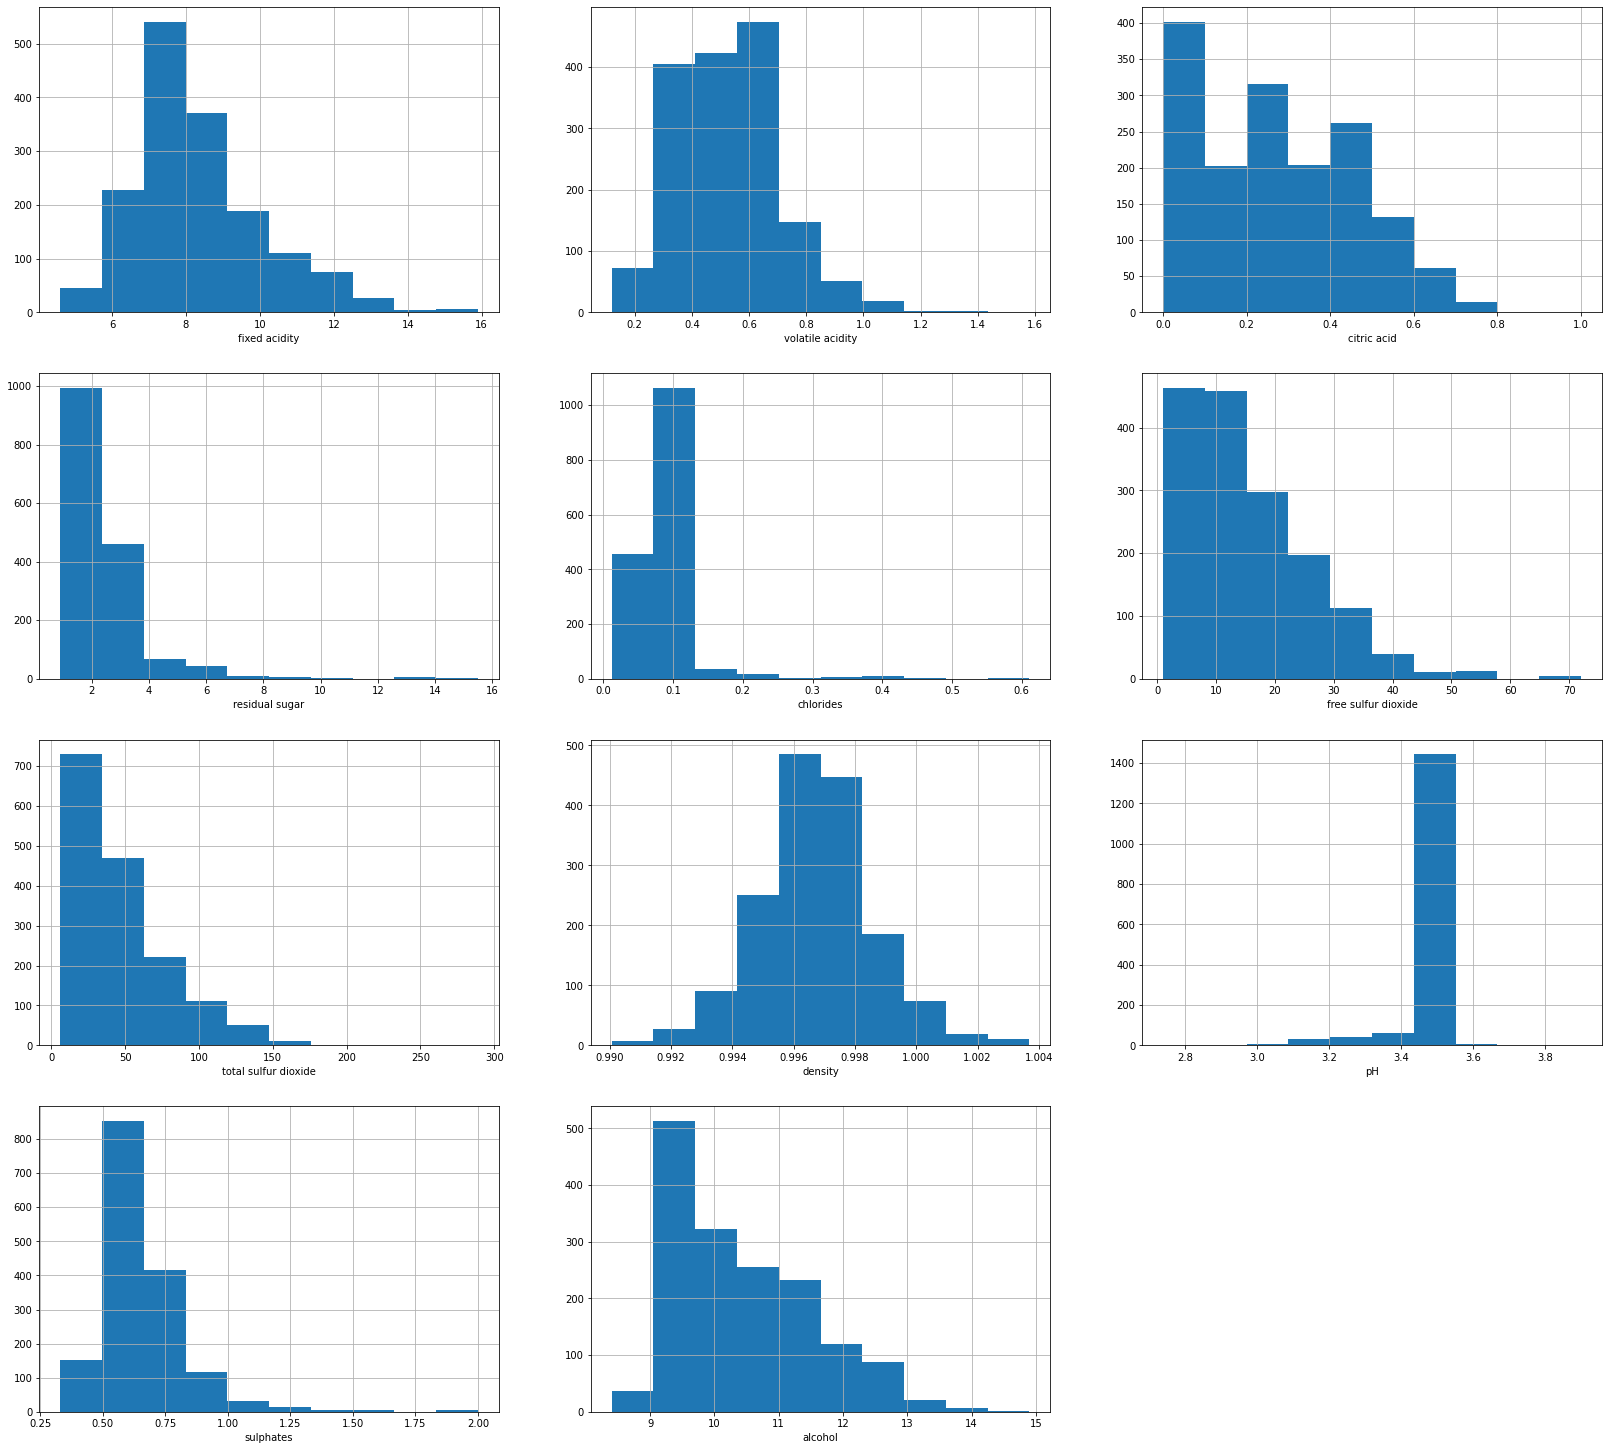

In [10]:
#  histogram  to view distribution of data
x=df.drop("quality",axis=1)
plt.figure(figsize=(28,100))
plotnumber=1
for i in x.columns:
    ax=plt.subplot(15,3,plotnumber)  # subplots to cover 3 plots at each row
    df[i].hist() 
    
    plt.xlabel(i ) # label name of feature
 
    plotnumber+=1 # at which place to place plot of each feature
plt.show() 

<AxesSubplot:xlabel='quality', ylabel='pH'>

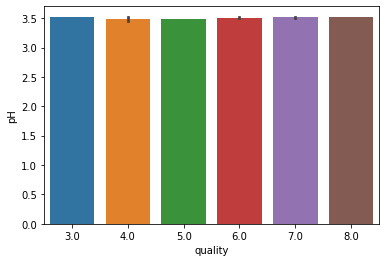

In [11]:
sns.barplot(df["quality"],df["pH"] )

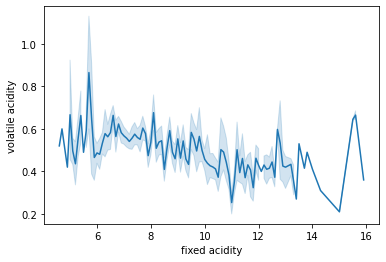

In [12]:
sns.lineplot(x=df["fixed acidity"],y=df["volatile acidity"])
plt.show()

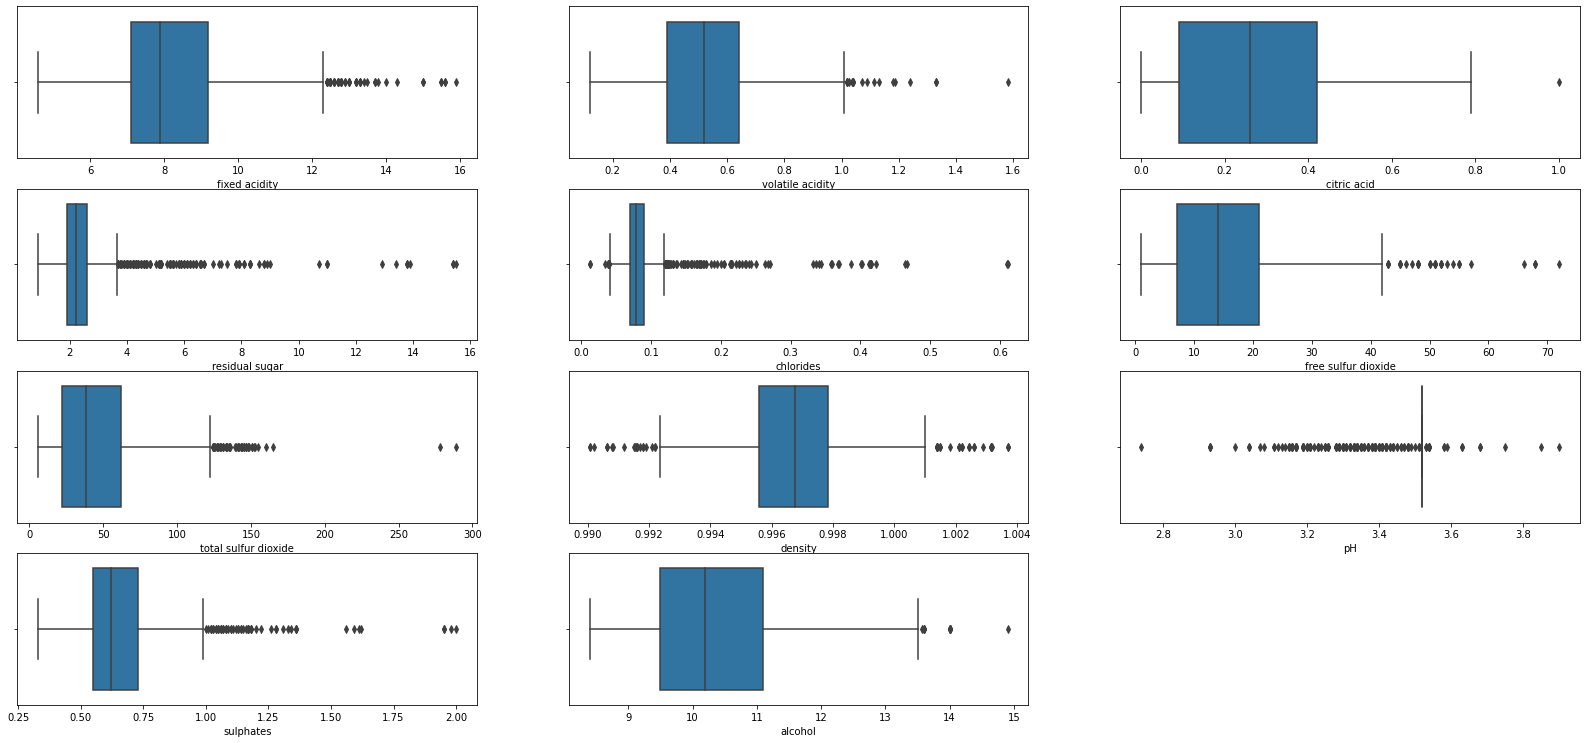

In [13]:
x=df.drop("quality",axis=1)
plt.figure(figsize=(28,100))
plotnumber=1
for i in x.columns:
    ax=plt.subplot(30,3,plotnumber) # subplots to cover 3 plots at each row
    sns.boxplot(df[i])
 
    plt.xlabel(i ) # label name of feature
 
    plotnumber+=1 # at which place to place plot of each feature
plt.show() 

# Bi-Variate

<AxesSubplot:xlabel='quality', ylabel='density'>

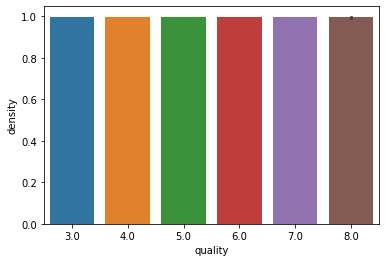

In [14]:
sns.barplot(df["quality"],df["density"] )

In [15]:
df.groupby("quality")["density"].mean() 

quality
3.0 0.997464
4.0 0.996542
5.0 0.997102
6.0 0.996614
7.0 0.996104
8.0 0.995212
Name: density, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='pH'>

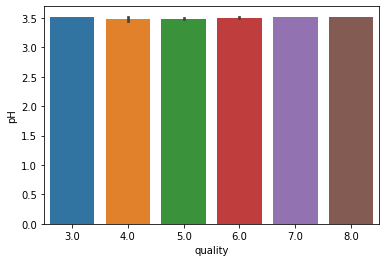

In [16]:
sns.barplot(df["quality"],df["pH"] )

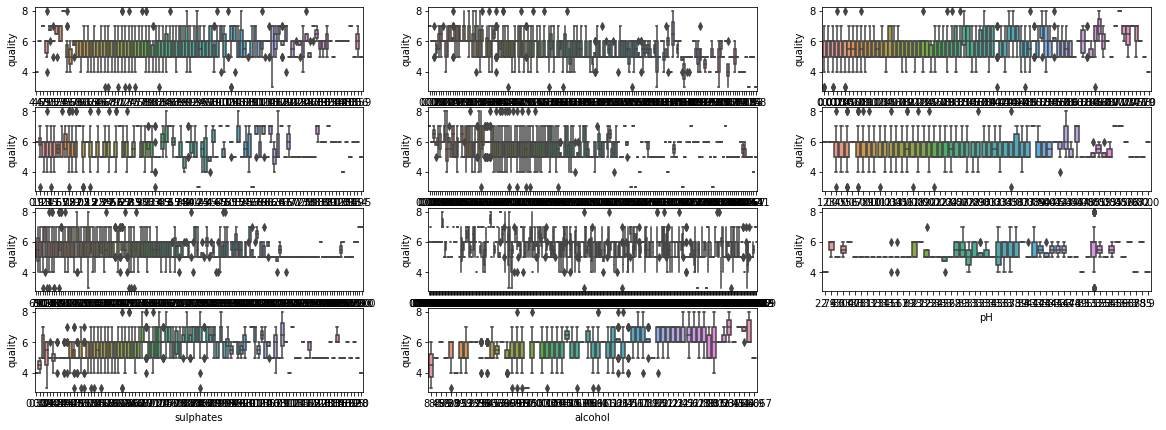

In [17]:
x = df.drop("quality", axis=1)
plt.figure(figsize=(20, 20))
plotnumber = 1
for i in x.columns:
    ax = plt.subplot(11, 3, plotnumber) # subplots to cover 3 plots at each row
    sns.boxplot(data=df, x=i, y="quality")
    plt.xlabel(i) # label name of feature
    plt.ylabel("quality")
    plotnumber += 1 # at which place to place plot of each feature
plt.show()

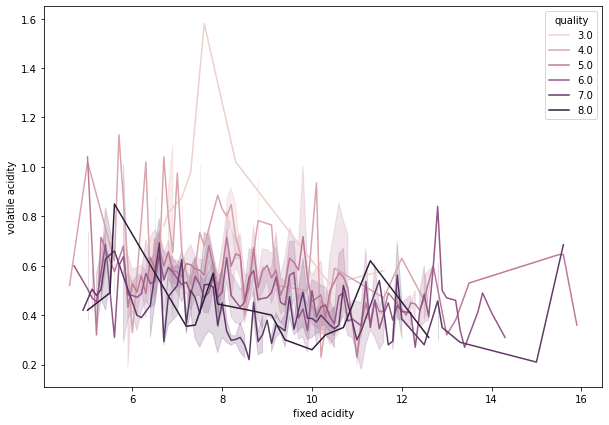

In [18]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df["fixed acidity"], y=df["volatile acidity"], hue=df["quality"])
plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
# Splitting data into features(X) and targets(y)
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
def train_model(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    y_prob=model.predict_proba(X_test_scaled)
    accuracy=np.round(round(accuracy_score(y_test,y_pred),3)*100,2)
    precision=np.round(round(precision_score(y_test,y_pred,average='weighted'),3)*100,2)
    recall=np.round(round(recall_score(y_test,y_pred,average='weighted'),3)*100,2)
    
    print(f'Accuracy of the model: {accuracy}%')
    print(f'Precision Score of the model: {precision}%')
    print(f'Recall Score of the model: {recall}%')
    print('-'*50)
    print(classification_report(y_test,y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 59.7%
Precision Score of the model: 56.8%
Recall Score of the model: 59.7%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.63      0.77      0.69       136
         6.0       0.55      0.56      0.56       128
         7.0       0.64      0.35      0.45        40
         8.0       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.30      0.28      0.28       320
weighted avg       0.57      0.60      0.57       320



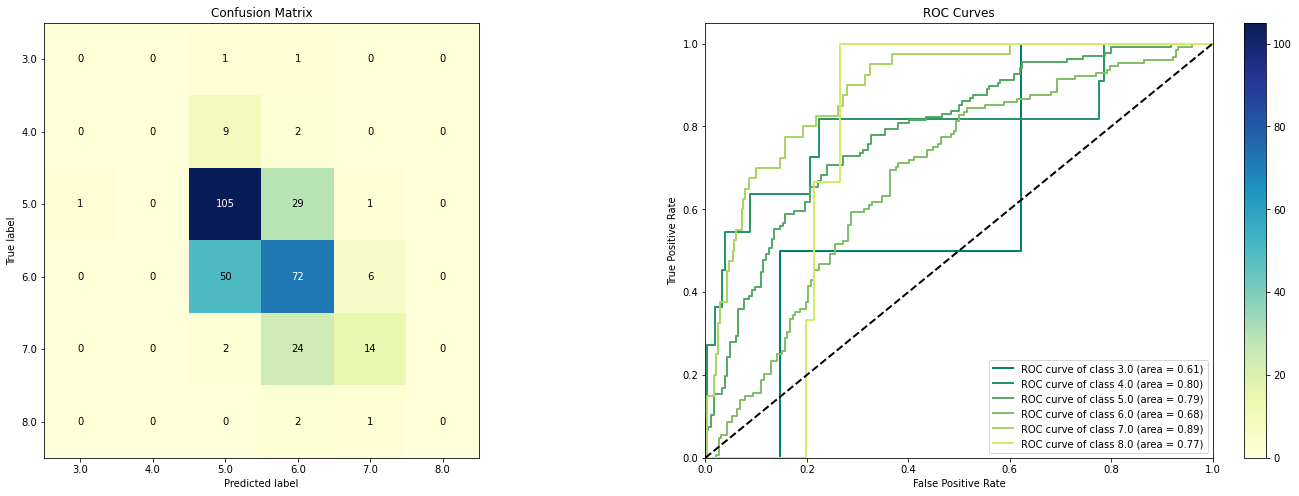

In [24]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
train_model(logreg)

Accuracy of the model: 14.1%
Precision Score of the model: 52.4%
Recall Score of the model: 14.1%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.01      0.50      0.02         2
         4.0       0.10      0.09      0.10        11
         5.0       0.72      0.24      0.36       136
         6.0       0.54      0.05      0.10       128
         7.0       0.00      0.00      0.00        40
         8.0       0.02      1.00      0.04         3

    accuracy                           0.14       320
   macro avg       0.23      0.31      0.10       320
weighted avg       0.52      0.14      0.20       320



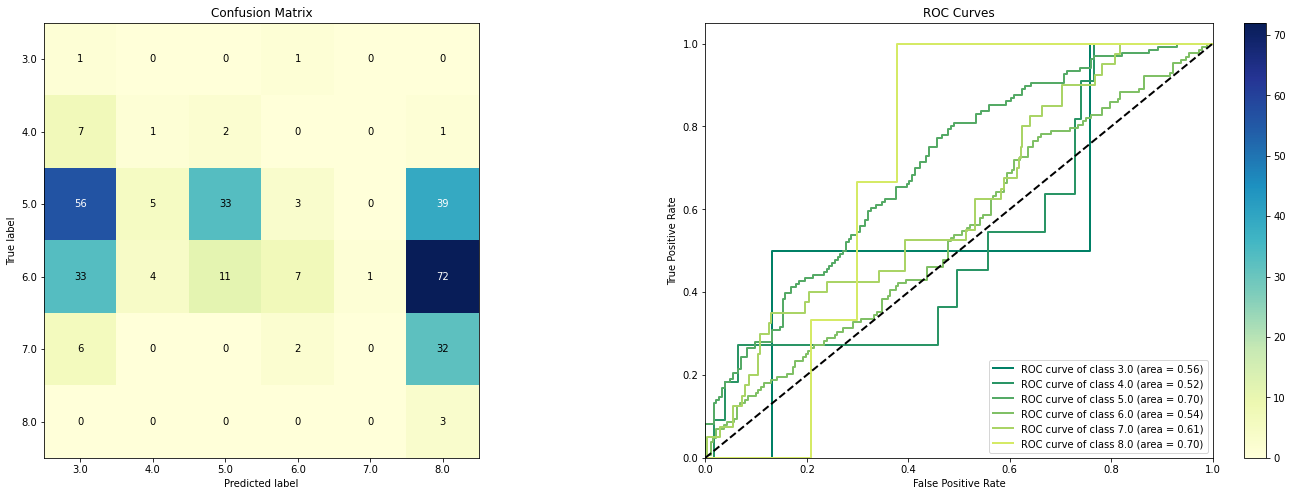

In [25]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
train_model(gnb)

Accuracy of the model: 58.1%
Precision Score of the model: 54.8%
Recall Score of the model: 58.1%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.63      0.75      0.69       136
         6.0       0.55      0.49      0.52       128
         7.0       0.48      0.53      0.50        40
         8.0       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.55      0.58      0.56       320



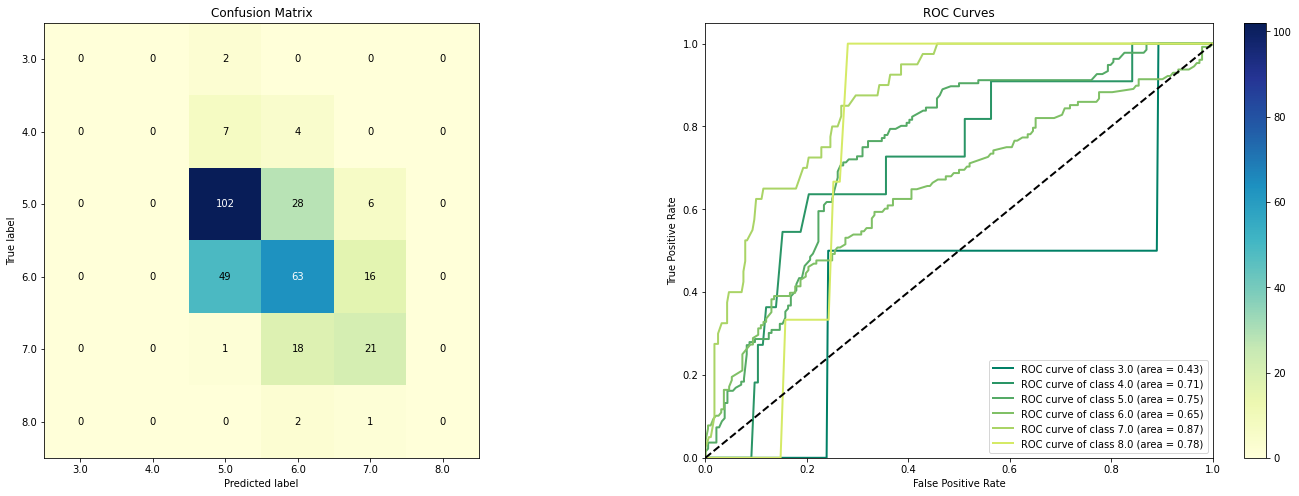

In [26]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
train_model(bnb)

Accuracy of the model: 69.4%
Precision Score of the model: 67.1%
Recall Score of the model: 69.4%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.74      0.77      0.76       136
         6.0       0.64      0.73      0.68       128
         7.0       0.79      0.55      0.65        40
         8.0       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.44      0.40      0.41       320
weighted avg       0.67      0.69      0.68       320



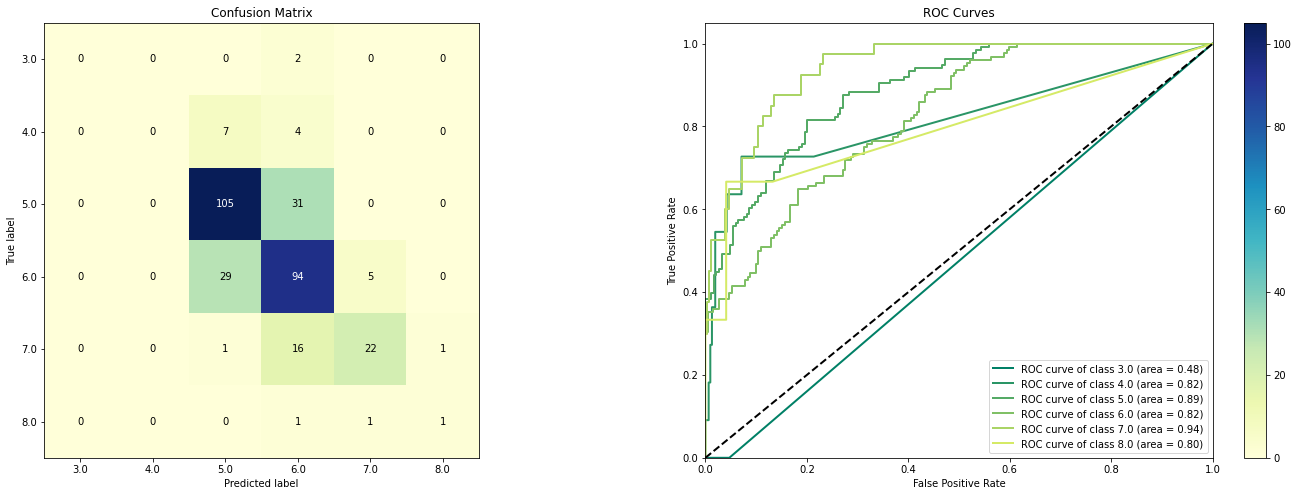

In [27]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"]}

knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn,params, cv = 10)
train_model(knn_cv)

Accuracy of the model: 61.6%
Precision Score of the model: 60.2%
Recall Score of the model: 61.6%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.50      0.18      0.27        11
         5.0       0.65      0.74      0.69       136
         6.0       0.60      0.55      0.58       128
         7.0       0.55      0.60      0.57        40
         8.0       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.38      0.35      0.35       320
weighted avg       0.60      0.62      0.60       320



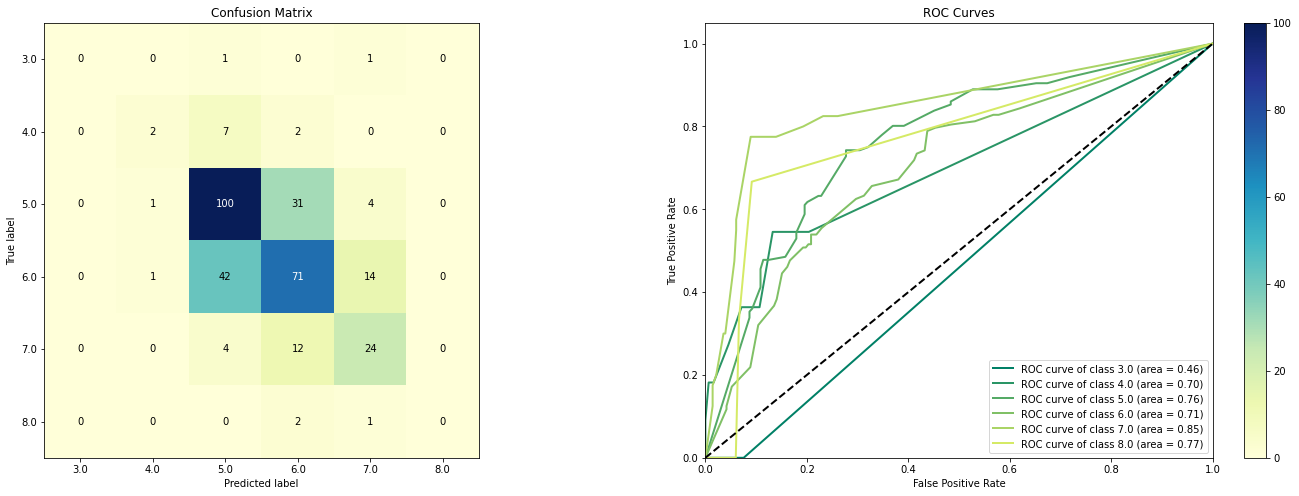

In [28]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

param= {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

dt= DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(dt, param_grid=param, cv=10)
train_model(dt_cv)

Accuracy of the model: 64.7%
Precision Score of the model: 64.7%
Recall Score of the model: 64.7%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.25      0.18      0.21        11
         5.0       0.68      0.75      0.72       136
         6.0       0.66      0.61      0.63       128
         7.0       0.65      0.60      0.62        40
         8.0       0.20      0.33      0.25         3

    accuracy                           0.65       320
   macro avg       0.41      0.41      0.41       320
weighted avg       0.65      0.65      0.65       320



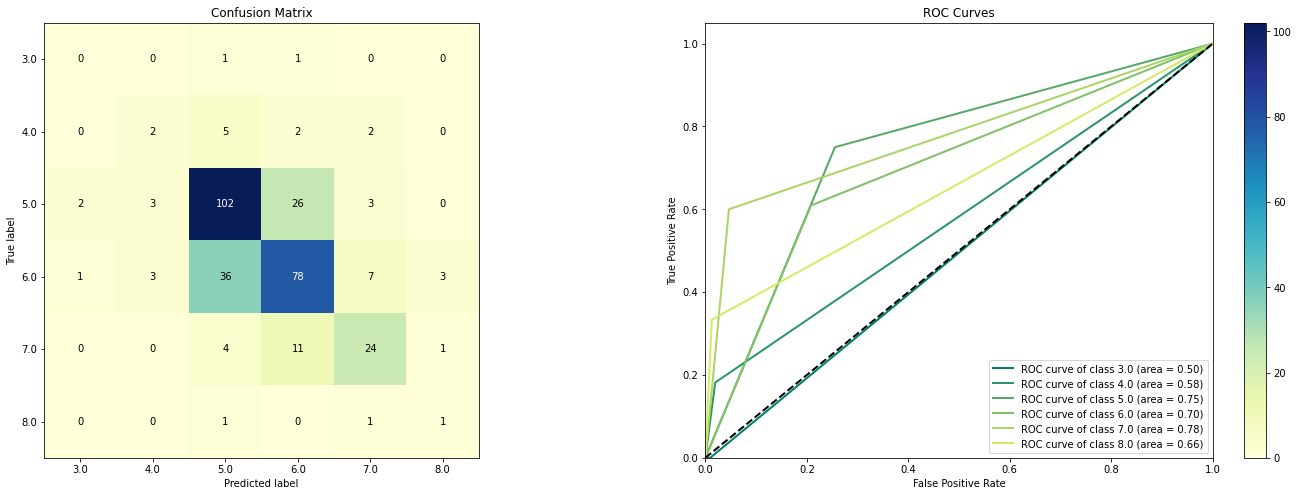

In [29]:
## Extra Trees

from sklearn.tree import ExtraTreeClassifier

et=ExtraTreeClassifier()
train_model(et)

Accuracy of the model: 67.2%
Precision Score of the model: 64.3%
Recall Score of the model: 67.2%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.69      0.82      0.75       136
         6.0       0.64      0.69      0.66       128
         7.0       0.76      0.40      0.52        40
         8.0       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.35      0.32      0.32       320
weighted avg       0.64      0.67      0.65       320



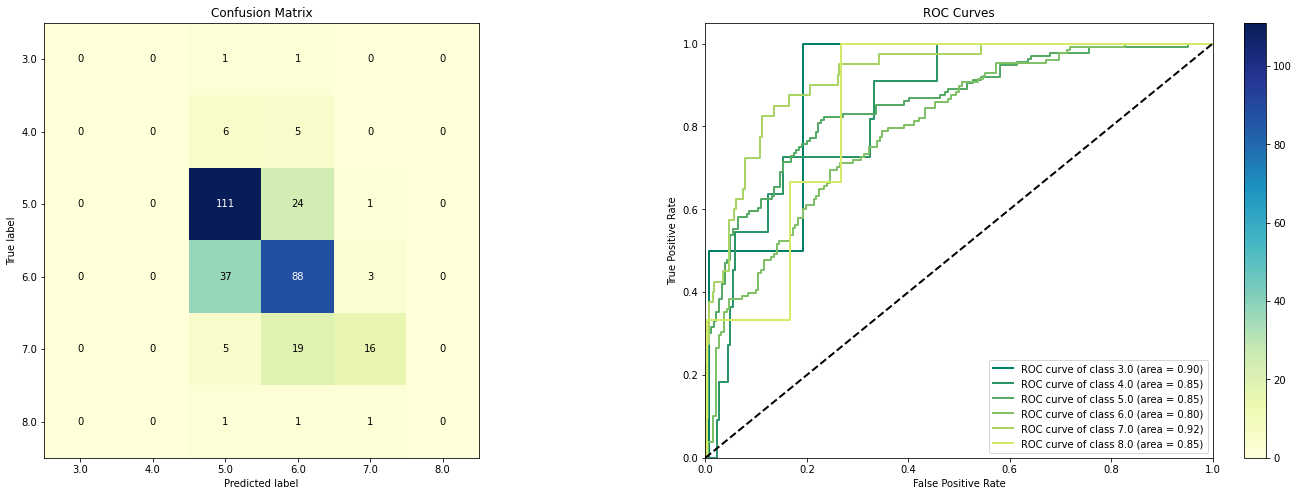

In [30]:
## SVC-Radial

from sklearn.svm import SVC

param= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm=SVC(probability=True)  
svm_cv = GridSearchCV(svm, param, cv=10)
train_model(svm_cv)

Accuracy of the model: 67.5%
Precision Score of the model: 67.8%
Recall Score of the model: 67.5%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.67      0.18      0.29        11
         5.0       0.69      0.74      0.71       136
         6.0       0.64      0.71      0.67       128
         7.0       0.81      0.55      0.66        40
         8.0       0.33      0.33      0.33         3

    accuracy                           0.68       320
   macro avg       0.52      0.42      0.44       320
weighted avg       0.68      0.68      0.67       320



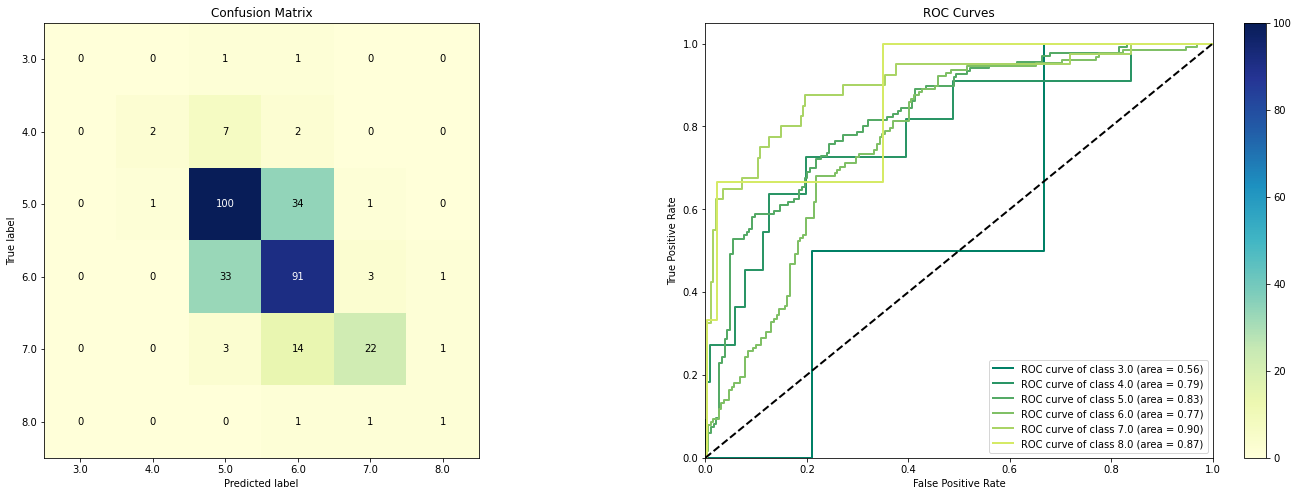

In [31]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier() 
train_model(gb)

Accuracy of the model: 69.1%
Precision Score of the model: 67.3%
Recall Score of the model: 69.1%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.71      0.79      0.75       136
         6.0       0.66      0.71      0.68       128
         7.0       0.81      0.55      0.66        40
         8.0       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.45      0.40      0.41       320
weighted avg       0.67      0.69      0.68       320



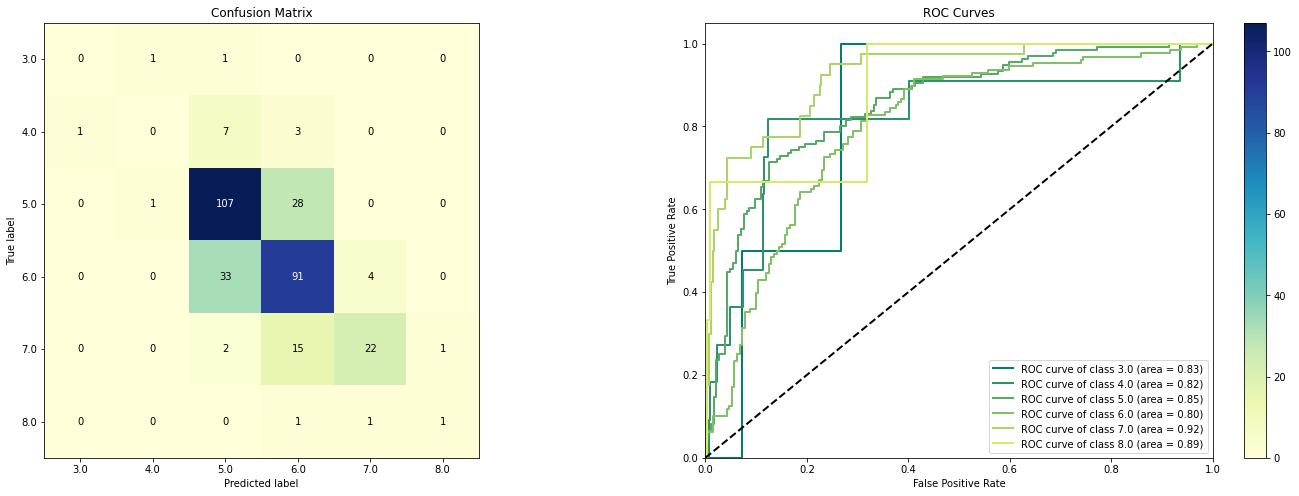

In [32]:
## CatBoost

from catboost import CatBoostClassifier 

cat = CatBoostClassifier(
    iterations=4000,
    random_seed=42,
    learning_rate=0.01,
    custom_loss=['Accuracy'],
    eval_metric='Accuracy' )

def train_model_cat(model):
    model.fit(X_train_scaled,y_train,logging_level='Silent')
    y_pred=model.predict(X_test_scaled)
    y_prob=model.predict_proba(X_test_scaled)
    accuracy=np.round(round(accuracy_score(y_test,y_pred),3)*100,2)
    precision=np.round(round(precision_score(y_test,y_pred,average='weighted'),3)*100,2)
    recall=np.round(round(recall_score(y_test,y_pred,average='weighted'),3)*100,2)
    
    print(f'Accuracy of the model: {accuracy}%')
    print(f'Precision Score of the model: {precision}%')
    print(f'Recall Score of the model: {recall}%')
    print('-'*50)
    print(classification_report(y_test,y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

    return

train_model_cat(cat)

Accuracy of the model: 69.1%
Precision Score of the model: 66.7%
Recall Score of the model: 69.1%
--------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        11
         5.0       0.72      0.78      0.75       136
         6.0       0.66      0.71      0.69       128
         7.0       0.72      0.57      0.64        40
         8.0       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.67      0.69      0.68       320



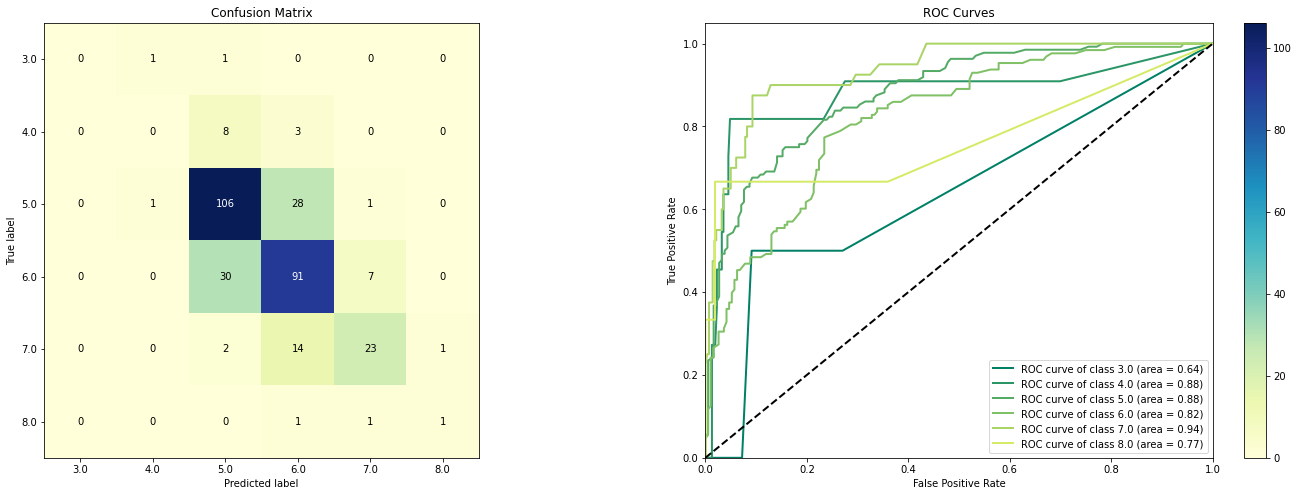

In [33]:
## Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200) 
train_model(bag)

# In conclusion,KNN Classifier shows the best overall performance for predicting the quality of the wine.